In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
%matplotlib inline

In [3]:
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'validation')

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 1495 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 664 images belonging to 2 classes.


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 78s 781ms/step - loss: 0.6777 - acc: 0.5544 - val_loss: 0.6953 - val_acc: 0.5511
Epoch 2/100
100/100 [==============================] - 60s 595ms/step - loss: 0.6413 - acc: 0.6458 - val_loss: 0.6683 - val_acc: 0.6376
Epoch 3/100
100/100 [==============================] - 76s 764ms/step - loss: 0.6368 - acc: 0.6433 - val_loss: 0.7184 - val_acc: 0.5707
Epoch 4/100
100/100 [==============================] - 78s 777ms/step - loss: 0.6318 - acc: 0.6458 - val_loss: 0.6639 - val_acc: 0.6149
Epoch 5/100
100/100 [==============================] - 76s 765ms/step - loss: 0.6188 - acc: 0.6709 - val_loss: 0.6960 - val_acc: 0.5795
Epoch 6/100
100/100 [==============================] - 63s 626ms/step - loss: 0.6096 - acc: 0.6744 - val_loss: 0.6642 - val_acc: 0.6206
Epoch 7/100
100/100 [==============================] - 65s 653ms/step - loss: 0.5955 - acc: 0.6898 - val_loss: 0.9124 - val_acc: 0.5227
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 91s 908ms/step - loss: 0.3538 - acc: 0.8441 - val_loss: 0.7707 - val_acc: 0.6812
Epoch 62/100
100/100 [==============================] - 83s 831ms/step - loss: 0.3674 - acc: 0.8304 - val_loss: 0.5866 - val_acc: 0.7487
Epoch 63/100
100/100 [==============================] - 88s 881ms/step - loss: 0.3570 - acc: 0.8404 - val_loss: 0.6924 - val_acc: 0.7292
Epoch 64/100
100/100 [==============================] - 83s 830ms/step - loss: 0.3665 - acc: 0.8385 - val_loss: 0.6406 - val_acc: 0.7178
Epoch 65/100
100/100 [==============================] - 84s 841ms/step - loss: 0.3488 - acc: 0.8487 - val_loss: 0.6683 - val_acc: 0.7330
Epoch 66/100
100/100 [==============================] - 84s 838ms/step - loss: 0.3555 - acc: 0.8471 - val_loss: 0.6494 - val_acc: 0.7184
Epoch 67/100
100/100 [==============================] - 84s 836ms/step - loss: 0.3490 - acc: 0.8429 - val_loss: 0.9415 - val_acc: 0.6604
Epoch 68/100
100/100 [===================

In [9]:
model.save('man_and_women.h5')

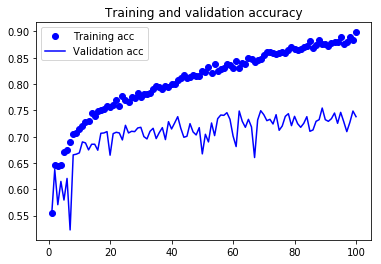

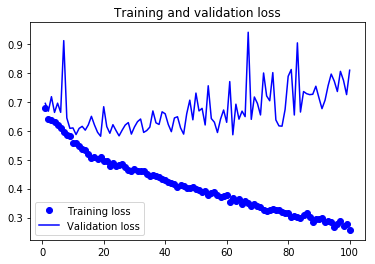

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 1150 images belonging to 2 classes.


In [17]:
probabilities = model.predict_generator(test_generator, 256)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


loss, acc = model.evaluate_generator(test_generator, steps=3, verbose=0)

Found 1150 images belonging to 2 classes.


In [31]:
print(f"Loss = {loss}\nAccuracy = {acc}")

Loss = 0.5931707223256429
Accuracy = 0.7708333134651184


In [17]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np

def get_prediction(img_path):
    img = Image.open(img_path)
    img = img.resize((150,150),Image.ANTIALIAS)
    img = np.asarray(img)
    plt.imshow(img)
    img = np.expand_dims(img, axis=0)
    img = tf.cast(img, tf.float32)
    x = model.predict(img)
    print("Prediction = ", end = '')
    if(x[0] < 0.5):
        print("male")
    else:
        print("female")
    print("Probability = ", x[0])

In [18]:
model = models.load_model('man_and_women.h5')

Prediction = female
Probability =  [1.]


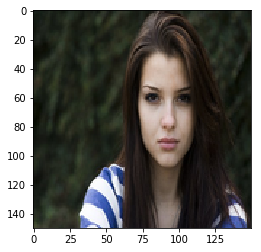

In [20]:
get_prediction("girl.jpg")

Prediction = female
Probability =  [1.]


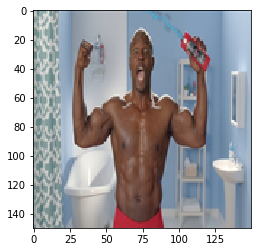

In [22]:
get_prediction("terry.jpg")